In [31]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import style
import numpy as np
import seaborn as sns

# 아달라인 - 경사하강법(Adaline - Gradient Descent)
# 모든 트레이닝 데이터를 한꺼번에 일괄 적용할 경우, 배치 경사하강법 이라고도 한다.

# 아래 코드는 최소자승법을 기반으로한 회귀 모델을 구현하기 위해 수정, 적용되었다.

style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
# krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
# krfont = {'family':'HYGothic-Extra', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

class LinearRegressionGD():
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def predict (self, X):
        return self.net_input(X)
        # 아달라인의 코드는 아래와 같음
        # 최소자승법 기반 회귀 모델의 가중치를 구하는 LinearRegressionGD()는
        # 아달라인의 활성화 함수의 결과값을 -1 또는 1로 변환하는 것만 빼고는
        # 동일한 로직이다.
        # return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
df = pd.read_csv('./data/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# 마지막 5개 데이터 표시를 원할 경우 활성화
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


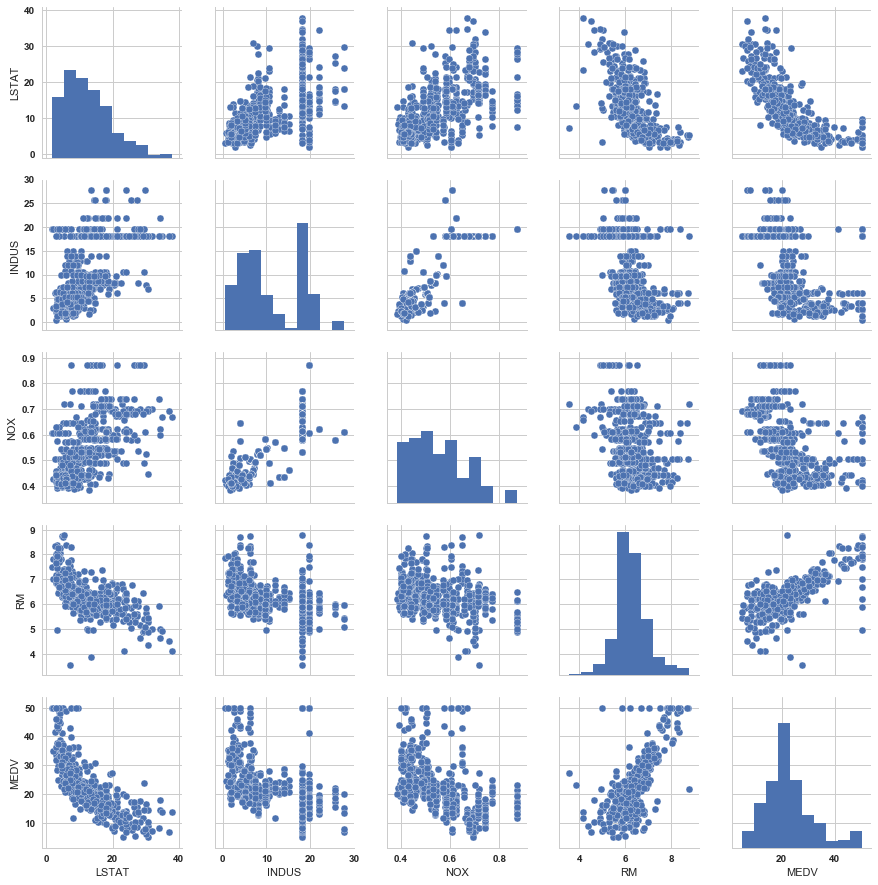

In [6]:
# 데이터의 페어플롯 표시를 원할 경우 활성화
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()
sns.reset_orig() # 원래 matplot 스타일로 복귀

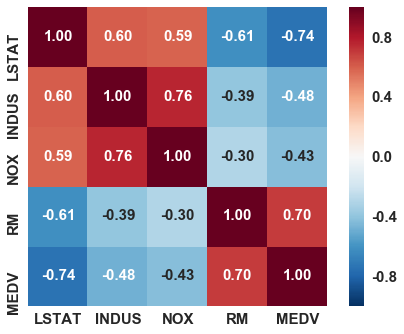

In [7]:
# heatmap 표시를 원할 경우 활성화
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.show()

<function matplotlib.pyplot.show>

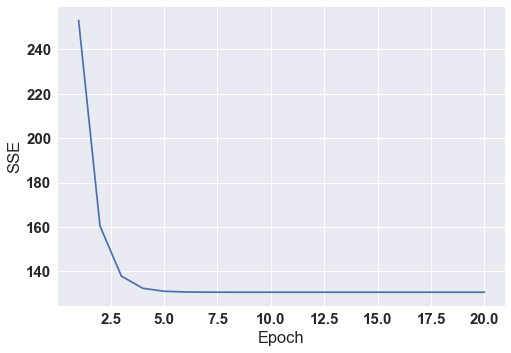

In [15]:
# 최소자승법을 활용한 회귀 모델
X = df[['RM']].values
y = df['MEDV'].values

# y.shape = (506, )이며, 이는 scikit-learn의 함수에서 아래와 같은 경고를 유발
# warning.warn(DEPRECATION_MSG_1D, DeprecationWarning)
# 따라서 임시로 차원을 (506, 1)로 바꿈
y = y.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

# 변환한 y의 차원 (506, )으로 복원함
y_std = y_std.reshape(-1, )

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

# RM(방의 수)-MEDV(집값)의 표준화된 값을 이용하여, 비용함수의 가중치를 업데이트 하는
# 반복횟수를 x축에, LinearRegressionGD에 의해 계산되는 비용함수의 값을 y축으로 그래프 그림
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.show

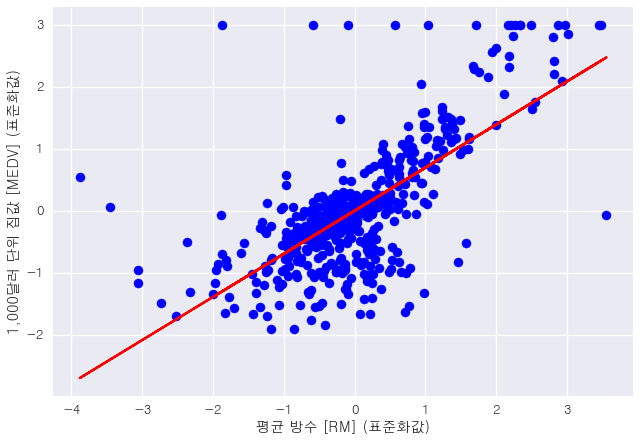

In [32]:
# 회귀 모델 생성
# x축 : 표준화된 RM값
# y축 : 표준화된 MEDV값
# 회귀모델 : 최소자승법으로 LinearRegression - GD(선형회귀 - 경사하강법) 구현
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='b')
    plt.plot(X, model.predict(X), c='r')
    
lin_regplot(X_std, y_std, lr)
plt.xlabel('평균 방수 [RM] (표준화값)')
plt.ylabel('1,000달러 단위 집값 [MEDV] (표준화값)')
plt.show()

In [26]:
# python matplotlib 에서 한글폰트 사용하기. font_manager 의 폰트 리스트 확인
# import matplotlib.font_manager
# [f.name for f in matplotlib.font_manager.fontManager.ttflist]
# [f.name for f in matplotlib.font_manager.fontManager.afmlist]


['STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'cmb10',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'cmss10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmsy10',
 'DejaVu Serif Display',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'cmmi10',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'cmr10',
 'STIXSizeTwoSym',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'cmex10',
 'DejaVu Serif',
 'DejaVu Sans Display',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'Arial',
 'Gill Sans Ultra Bold',
 'Gabriola',
 'Colonna MT',
 'Broadway',
 'Raleway',
 'Dubai',
 'Consolas',
 'Consolas',
 'Calibri',
 'Rage Italic',
 'Microsoft PhagsPa',
 'Bodoni MT',
 'Calisto MT',
 'Bodoni MT',
 'Rockwell Condensed',
 'Calibri',
 'Segoe UI',
 'Harrington',
 'Tw Cen MT',
 'Playbill',
 'Vivaldi',
 'HCR Batang Ext',
 'Er

In [35]:
# 주택 가격 예측
num_rooms = 5.0
num_rooms_std = sc_x.transform([[num_rooms]])
house_val_std = lr.predict(num_rooms_std)
house_val = sc_y.inverse_transform(house_val_std)

print('방이 [%d]개인 주택가격은 약 [%.f]달러입니다.' %(int(num_rooms), house_val*1000))

방이 [5]개인 주택가격은 약 [10840]달러입니다.
